# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities_df = pd.DataFrame(cities)
cities_df

Number of cities in the list: 607


,0
0,taiohae
1,diego de almagro
2,iqaluit
3,celestun
4,yellowknife
...,...
602,mawlaik
603,persembe
604,rapid city
605,huanggang


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    # FYI i % 50 == 0, checks whether i is evenly divisible by 50
    # and "and i >= 50" checks if it is greater than 50 
    # if both conditions are met, then it will up the set count to 2
    #note the enumerate function above is already retrieving the city with its index number, so we are only creating sets of 50 here. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "&q=" + city.replace(" ","+")
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_json = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # temperature = weather_json["main"]["temp"]
        # i need to see the json in order to wrok out how to retrieve the data 
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
'coord'
City not found. Skipping...
Processing Record 2 of Set 1 | diego de almagro
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | celestun
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | ankang
Processing Record 8 of Set 1 | kiffa
Processing Record 9 of Set 1 | lewiston orchards
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | delta
Processing Record 12 of Set 1 | buzen
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | zaozersk
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | klamath falls
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | altai
Processing Record 

'coord'
City not found. Skipping...
Processing Record 37 of Set 4 | crescent city
Processing Record 38 of Set 4 | comodoro rivadavia
Processing Record 39 of Set 4 | bardai
Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | sovetsk
Processing Record 42 of Set 4 | mata-utu
Processing Record 43 of Set 4 | vorgashor
Processing Record 44 of Set 4 | severo-yeniseyskiy
Processing Record 45 of Set 4 | ta`u
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | guaruja
Processing Record 48 of Set 4 | qamdo
Processing Record 49 of Set 4 | port moresby
Processing Record 0 of Set 5 | zara
Processing Record 1 of Set 5 | remire-montjoly
Processing Record 2 of Set 5 | davlekanovo
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | oistins
Processing Record 5 of Set 5 | mumford
Processing Record 6 of Set 5 | verkh-chebula
Processing Record 7 of Set 5 | gaalkacyo
Processing Record 8 of Set 5 | naze
Processing Record 9 of Set 5 | constantia
Processing Re

Processing Record 32 of Set 8 | ra's bayrut
Processing Record 33 of Set 8 | faya-largeau
Processing Record 34 of Set 8 | qaqortoq
Processing Record 35 of Set 8 | mariental
Processing Record 36 of Set 8 | kalmunai
Processing Record 37 of Set 8 | hilo
Processing Record 38 of Set 8 | nogliki
Processing Record 39 of Set 8 | fort bragg
Processing Record 40 of Set 8 | xinxiang
Processing Record 41 of Set 8 | seydi
Processing Record 42 of Set 8 | chifeng
Processing Record 43 of Set 8 | siniscola
Processing Record 44 of Set 8 | fort-shevchenko
Processing Record 45 of Set 8 | greensburg
Processing Record 46 of Set 8 | ponta delgada
Processing Record 47 of Set 8 | ust-nera
Processing Record 48 of Set 8 | las tablas
Processing Record 49 of Set 8 | hammerfest
Processing Record 0 of Set 9 | mutare
Processing Record 1 of Set 9 | humaita
Processing Record 2 of Set 9 | tomatlan
Processing Record 3 of Set 9 | santa cruz
Processing Record 4 of Set 9 | bayanaul
Processing Record 5 of Set 9 | sosnovka
Pro

Processing Record 21 of Set 12 | san julian
Processing Record 22 of Set 12 | laurel bay
Processing Record 23 of Set 12 | vryheid
Processing Record 24 of Set 12 | greenville
Processing Record 25 of Set 12 | bargaal
Processing Record 26 of Set 12 | kolda
Processing Record 27 of Set 12 | tianshui
Processing Record 28 of Set 12 | inhambane
Processing Record 29 of Set 12 | veinticinco de mayo
Processing Record 30 of Set 12 | i-n-salah
Processing Record 31 of Set 12 | reggane
Processing Record 32 of Set 12 | pupri
Processing Record 33 of Set 12 | ipueiras
Processing Record 34 of Set 12 | zavodskoy
Processing Record 35 of Set 12 | piacabucu
Processing Record 36 of Set 12 | el jadid
Processing Record 37 of Set 12 | san andres
Processing Record 38 of Set 12 | borba
Processing Record 39 of Set 12 | cozumel
Processing Record 40 of Set 12 | ulan bator
Processing Record 41 of Set 12 | nichinan
Processing Record 42 of Set 12 | cable beach
'coord'
City not found. Skipping...
Processing Record 43 of S

In [35]:
print(weather_json)
#how can i print this with indent?

{'coord': {'lon': -1.1494, 'lat': 60.1545}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 47.39, 'temp_min': 50, 'temp_max': 50, 'pressure': 1028, 'humidity': 81, 'sea_level': 1028, 'grnd_level': 1028}, 'visibility': 10000, 'wind': {'speed': 6.58, 'deg': 56, 'gust': 7.52}, 'clouds': {'all': 65}, 'dt': 1685812164, 'sys': {'type': 1, 'id': 1438, 'country': 'GB', 'sunrise': 1685760605, 'sunset': 1685826938}, 'timezone': 3600, 'id': 2644605, 'name': 'Lerwick', 'cod': 200}


    #     city_lat = weather_json["coord"]["lat"]
     #    city_lng = weather_json["coord"]["lon"]
    #     city_max_temp = weather_json["main"]["temp_max"]
      #  city_humidity = weather_json["main"]["humidty"]
     #   city_clouds = weather_json["clouds"]["all"]
       # city_wind = weather_json["wind"]["speed"]
        #city_country = weather_json["sys"]["country"]
        #city_date = weather_json["dt"]

In [40]:
#need to print off the JSON file to help in the code above

response = requests.get(city_url).json()
indented_response = json.dumps(response, indent=4)

print(indented_response)

# could have used print(json.dumps(geo_data, indent=4, sort_keys=True))

{
    "coord": {
        "lon": -1.1494,
        "lat": 60.1545
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 50,
        "feels_like": 47.34,
        "temp_min": 50,
        "temp_max": 50,
        "pressure": 1028,
        "humidity": 82,
        "sea_level": 1028,
        "grnd_level": 1028
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.67,
        "deg": 54,
        "gust": 7.81
    },
    "clouds": {
        "all": 74
    },
    "dt": 1685815512,
    "sys": {
        "type": 1,
        "id": 1438,
        "country": "GB",
        "sunrise": 1685760605,
        "sunset": 1685826938
    },
    "timezone": 3600,
    "id": 2644605,
    "name": "Lerwick",
    "cod": 200
}


In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,diego de almagro,-26.3667,-70.0500,25.32,22,75,2.43,CL,1685816194
1,iqaluit,63.7506,-68.5145,2.85,74,100,2.06,CA,1685816194
2,celestun,20.8667,-90.4000,29.60,59,85,3.70,MX,1685816194
3,yellowknife,62.4560,-114.3525,14.29,58,100,4.12,CA,1685816195
4,kodiak,57.7900,-152.4072,10.73,62,100,5.66,US,1685816309


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [49]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,diego de almagro,-26.3667,-70.0500,25.32,22,75,2.43,CL,1685816194
1,iqaluit,63.7506,-68.5145,2.85,74,100,2.06,CA,1685816194
2,celestun,20.8667,-90.4000,29.60,59,85,3.70,MX,1685816194
3,yellowknife,62.4560,-114.3525,14.29,58,100,4.12,CA,1685816195
4,kodiak,57.7900,-152.4072,10.73,62,100,5.66,US,1685816309


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [50]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

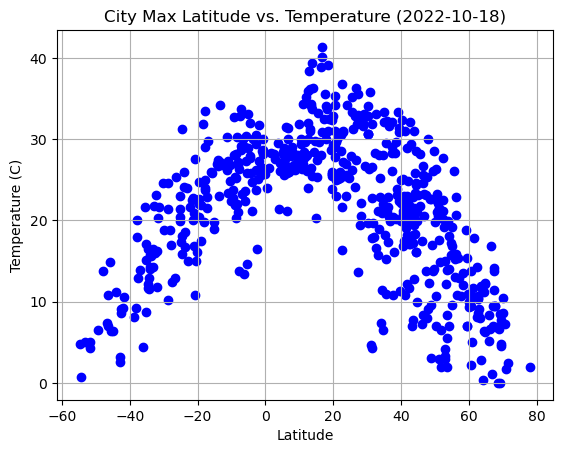

In [53]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.grid(True)
# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

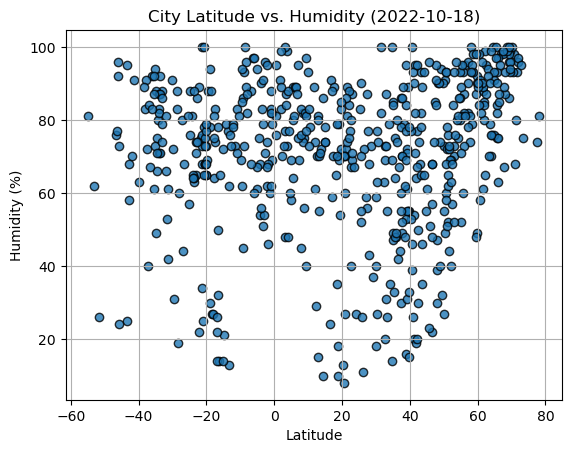

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]


plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

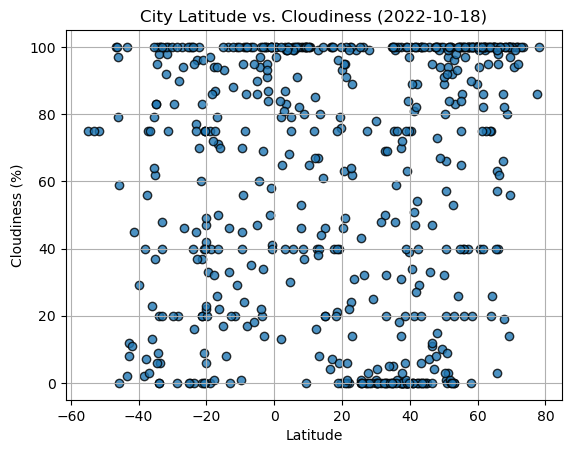

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]


plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

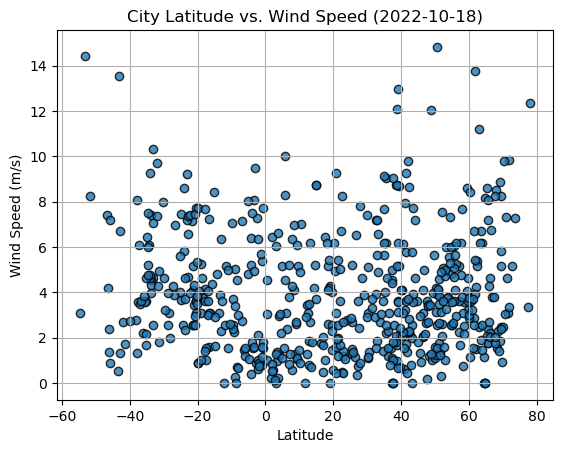

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]


plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
# Define a function to create Linear Regression plots
#for latitude vs max temp 
def linear_regression(x_axis, y_axis, title, ylabel, annotate_x, annotate_y):
    d_slope, d_int, d_r, d_p, d_std_err = linregress(x_axis, y_axis)
    d_fit = d_slope * x_axis + d_int
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis,d_fit,"--", color = "red")
#    plt.xticks(x_axis, rotation=90)
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    pearson_coeff, _= pearsonr(x_axis, y_axis)
    
    line_eq = "y = " + str(round(d_slope,2)) + "x +" + str(round(d_int,2))
        
    plt.annotate(line_eq,(annotate_x, annotate_y),fontsize=15,color="red")
    print(f"The r-value is: {pearson_coeff**2}")
    
    plt.show()
 

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,2.85,74,100,2.06,CA,1685816194
2,celestun,20.8667,-90.4000,29.60,59,85,3.70,MX,1685816194
3,yellowknife,62.4560,-114.3525,14.29,58,100,4.12,CA,1685816195
4,kodiak,57.7900,-152.4072,10.73,62,100,5.66,US,1685816309
5,ankang,32.6800,109.0172,16.62,96,100,1.22,CN,1685816309


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,diego de almagro,-26.3667,-70.0500,25.32,22,75,2.43,CL,1685816194
11,ushuaia,-54.8000,-68.3000,4.81,81,0,1.03,AR,1685816310
12,margaret river,-33.9500,115.0667,13.98,72,100,5.97,AU,1685816310
15,waitangi,-43.9535,-176.5597,11.18,61,77,6.78,NZ,1685816310
16,puerto ayora,-0.7393,-90.3518,29.98,89,66,4.02,EC,1685816310


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5518791457396955


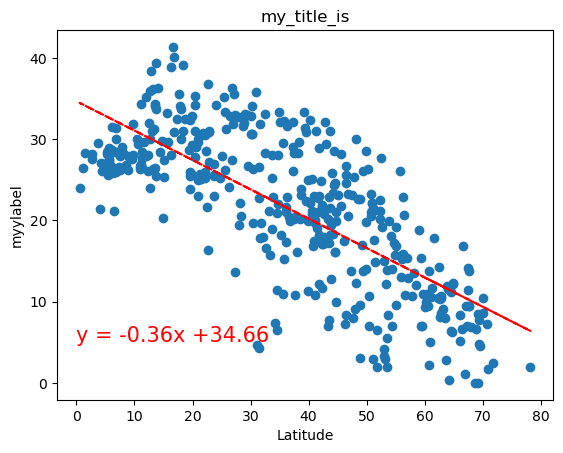

In [87]:
# NEED TO DEFINE X AND Y VALUES 
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

# Linear regression on Northern Hemisphere
linear_regression(x_axis, y_axis, "Scatter plot showing the relationship between temperature and latitude in the Northern Hemisphere", "Temperature (C)", 0,5)


# Get regression values
#regress_values = x_values * slope + intercept
#print(regress_values)

The r-value is: 0.6552361602002371


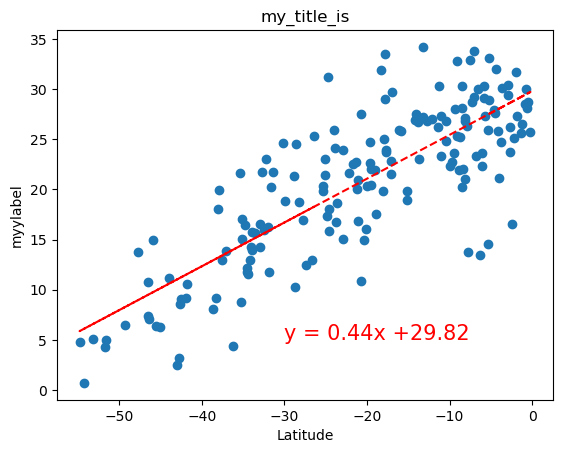

In [89]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]

# Linear regression on Northern Hemisphere
linear_regression(x_axis, y_axis, "Scatter plot showing the relationship between temperature and latitude in the Southern Hemisphere", "Temperature (C)", -30,5)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0009962233670704587


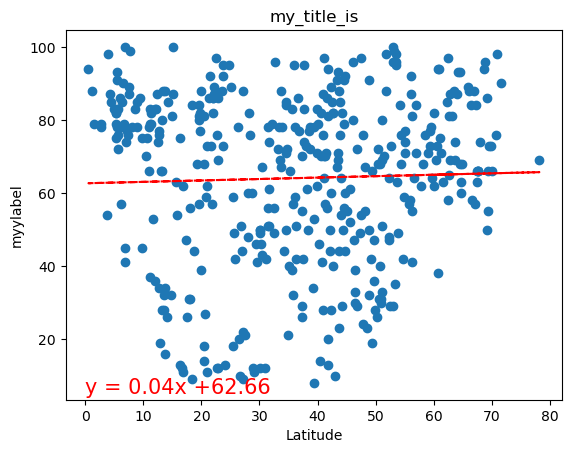

In [90]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]

# Linear regression on Northern Hemisphere
linear_regression(x_axis, y_axis, "Scatter plot showing the relationship between temperature and latitude in the Northern Hemisphere", "Humidity", 0,5)

The r-value is: 0.0002808747046324607


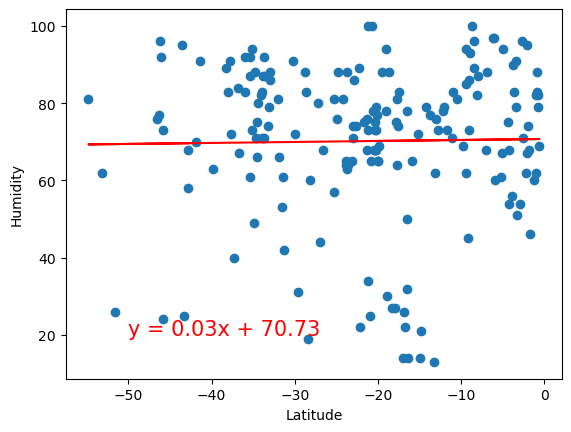

In [18]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]

# Linear regression on Southern Hemisphere
linear_regression(x_axis, y_axis, "Scatter plot showing the relationship between temperature and latitude in the Southern Hemisphere", "Humidity", 0,5)

**Discussion about the linear relationship:** YThere is a poor correlation between humidity and latitude in either Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


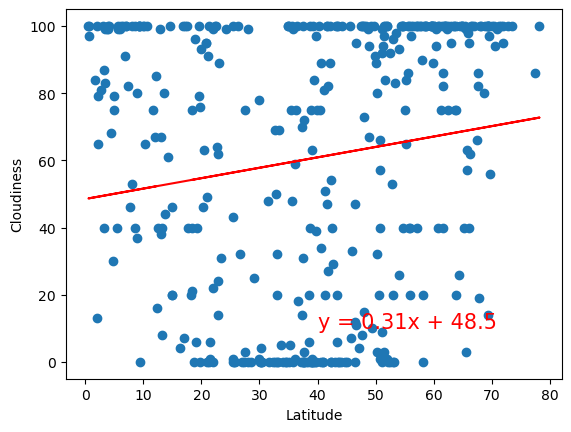

In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]

# Linear regression on Northern Hemisphere
linear_regression(x_axis, y_axis, "Scatter plot showing the relationship between cloudiness and latitude in the Northern Hemisphere", "Cloudiness", 0,5)

The r-value is: 0.02056735429994368


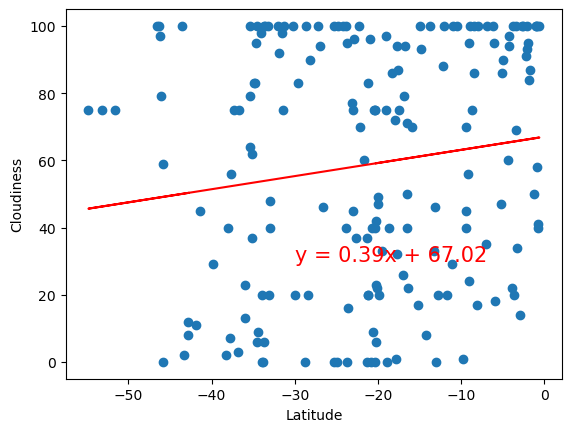

In [20]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]

# Linear regression on Northern Hemisphere
linear_regression(x_axis, y_axis, "Scatter plot showing the relationship between cloudiness and latitude in the Southern Hemisphere", "Cloudiness", 0,5)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


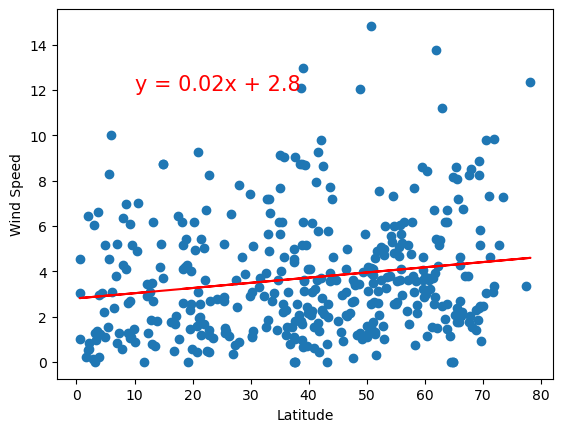

In [21]:
# Northern Hemisphere# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind speed"]

# Linear regression on Northern Hemisphere
linear_regression(x_axis, y_axis, "Scatter plot showing the relationship between wind speed and latitude in the Northern Hemisphere", "Wind Speed", 0,5)

The r-value is: 0.062239040700515696


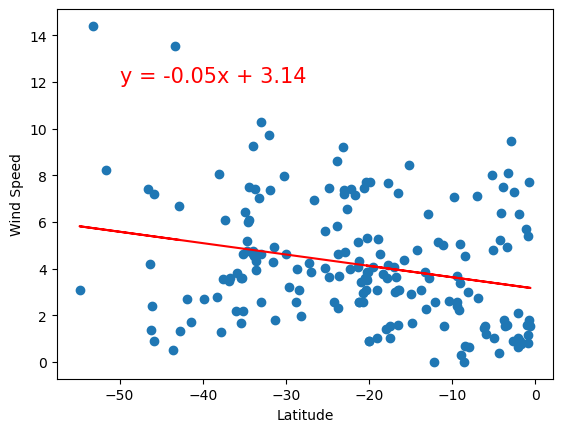

In [22]:
# Southern Hemisphere

x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]

# Linear regression on Northern Hemisphere
linear_regression(x_axis, y_axis, "Scatter plot showing the relationship between Wind Speed and Latitude in the Southern Hemisphere", "Wind Speed", 0,5)